### Indice

- [Grafo](#Grafo)
- [Motif](#Motif)
- [Rinomina](#Rinomina)
- [Identify](#Identify)
- [Zippa](#Zippa)
- [Pipeline gerarchica multicompressione](#Pipeline-gerarchica-multicompressione)
- [Procedura frattale](#Procedura-frattale)
- [Memorizza merge](#Memorizza-merge)
- [Indici](#Indici)

In [1]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
from grandiso import find_motifs
from operator import itemgetter
from collections import defaultdict

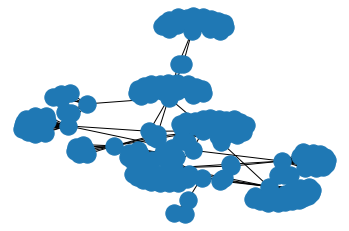

In [2]:
filename = 'bn-mouse_visual-cortex_2.edges'
G = nx.read_edgelist(filename)

nx.draw_networkx(G, with_labels=False)
plt.axis('off')
plt.show()

In [2]:
%load_ext pycodestyle_magic
# %%pycodestyle

### Grafo 
[torna su](#Indice)

Grafo test di base `G`

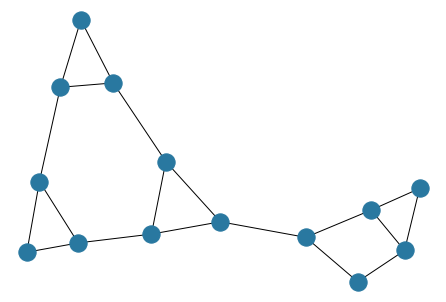

In [34]:
G0 = nx.Graph()
G0.add_edges_from([(1, 2), (2, 3), (1, 3), (2, 4), (4, 5), (5, 6), (4, 6),
                   (6, 8), (7, 8), (7, 9), (8, 9), (3, 7), (5, 14), (14, 10),
                   (14, 13), (10, 11), (11, 12), (10, 12), (12, 13)])

nx.draw(G0, node_color='#2978A0')

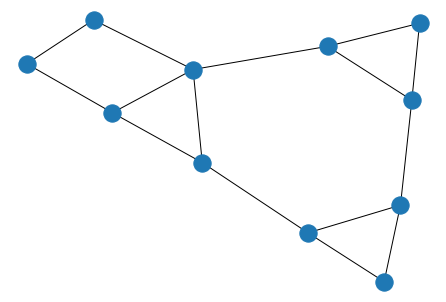

In [4]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (1, 3), (3, 4), (3, 5), (5, 6), (6, 7), (5, 7), (7, 9), (8, 9), (9, 10), (8, 10), (2, 8), (4, 11), (11, 1)])
nx.draw(G1)

### Motif 
[torna su](#Indice)

Sottografo `motif`

In [3]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

### Rinomina 
[torna su](#Indice)

Rinomina nodi del grafo `G` in tuple `(livello, nodo)`

In [4]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)

    return G

### Identify
[torna su](#Indice)

Identify `motif` in `G`

In [5]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    if lista1 == []:
        return lista1
    else:
        lista2 = [list(d.values()) for d in lista1]
        lista3 = list(set(tuple(sorted(s)) for s in lista2))
        lista4 = sorted(lista3)
        risultato = [list(el) for el in lista4]

        return risultato

### Zippa
[torna su](#Indice)

Restituisce il mapping per la compressione

In [6]:
def zippa(results, nodes):
    # max_liv = max(results[0], key=lambda item:item[0])[0]
    max_liv = max(results[0], key=itemgetter(0))[0]
    lista_temp = []
    tri = []
    for x in nodes:
        if x in results[0]:
            # sostituisci il livello del primo nodo
            # (per comodità scelgo il primo) con il MAX+1
            x = list(x)
            x[0] = max_liv+1
            x = tuple(x)
            tri.append(x)
    if len(tri) == len(results[0]):
        for x in nodes:
            if x in results[0]:
                lista_temp.append(tri[0])
            else:
                lista_temp.append(x)
        mapping = dict(zip(nodes, lista_temp))

        return mapping

---

### Pipeline gerarchica multicompressione
[torna su](#Indice)

_versione livelli misti, non frattale_

Funzione `multicoll`:
- Output: Liste di nodi e archi da cui si ricava il grafo risultate
- Nelle compressioni multiple il livello è gestito implicitamente

In [7]:
G0 = rinomina(G)

In [8]:
def multicoll(G, motif):
    liv = 1
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
        else:
            mapping = zippa(ris, nodi)
            print(mapping)
            G = nx.relabel_nodes(G, mapping)
            # togli triangolo usato
            # la lista ris diminuisce
            ris = ris[1:]
            # i nodi cambiano, sono il risultato della compressione
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv += 1

    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))

    res = list(zip(d, map(min, d.values())))
    

    return res


In [9]:
res = multicoll(G0, motif)

{(0, '1'): (1, '1'), (0, '10'): (0, '10'), (0, '100'): (0, '100'), (0, '101'): (0, '101'), (0, '102'): (0, '102'), (0, '103'): (0, '103'), (0, '104'): (0, '104'), (0, '105'): (0, '105'), (0, '106'): (0, '106'), (0, '107'): (0, '107'), (0, '108'): (0, '108'), (0, '109'): (0, '109'), (0, '11'): (0, '11'), (0, '110'): (0, '110'), (0, '111'): (0, '111'), (0, '112'): (0, '112'), (0, '113'): (0, '113'), (0, '114'): (0, '114'), (0, '115'): (0, '115'), (0, '116'): (0, '116'), (0, '117'): (0, '117'), (0, '118'): (0, '118'), (0, '119'): (0, '119'), (0, '12'): (1, '1'), (0, '120'): (0, '120'), (0, '121'): (0, '121'), (0, '122'): (0, '122'), (0, '123'): (0, '123'), (0, '124'): (0, '124'), (0, '125'): (0, '125'), (0, '126'): (0, '126'), (0, '127'): (0, '127'), (0, '128'): (0, '128'), (0, '129'): (0, '129'), (0, '130'): (0, '130'), (0, '131'): (0, '131'), (0, '132'): (0, '132'), (0, '133'): (0, '133'), (0, '134'): (0, '134'), (0, '135'): (0, '135'), (0, '136'): (0, '136'), (0, '137'): (0, '137'), (0

In [10]:
res

[(0,
  (193,
   [(0, '1'),
    (0, '10'),
    (0, '100'),
    (0, '101'),
    (0, '102'),
    (0, '103'),
    (0, '104'),
    (0, '105'),
    (0, '106'),
    (0, '107'),
    (0, '108'),
    (0, '109'),
    (0, '11'),
    (0, '110'),
    (0, '111'),
    (0, '112'),
    (0, '113'),
    (0, '114'),
    (0, '115'),
    (0, '116'),
    (0, '117'),
    (0, '118'),
    (0, '119'),
    (0, '12'),
    (0, '120'),
    (0, '121'),
    (0, '122'),
    (0, '123'),
    (0, '124'),
    (0, '125'),
    (0, '126'),
    (0, '127'),
    (0, '128'),
    (0, '129'),
    (0, '130'),
    (0, '131'),
    (0, '132'),
    (0, '133'),
    (0, '134'),
    (0, '135'),
    (0, '136'),
    (0, '137'),
    (0, '138'),
    (0, '139'),
    (0, '14'),
    (0, '140'),
    (0, '141'),
    (0, '142'),
    (0, '143'),
    (0, '144'),
    (0, '145'),
    (0, '146'),
    (0, '147'),
    (0, '148'),
    (0, '149'),
    (0, '15'),
    (0, '150'),
    (0, '151'),
    (0, '152'),
    (0, '153'),
    (0, '154'),
    (0, '155'),
  

In [11]:
# res = multicoll(G0, motif)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

Livello:  [0, 1, 2, 3, 4, 5] 
# nodi:  [193, 189, 185, 183, 181, 179] 
Nodi:  [[(0, '1'), (0, '10'), (0, '100'), (0, '101'), (0, '102'), (0, '103'), (0, '104'), (0, '105'), (0, '106'), (0, '107'), (0, '108'), (0, '109'), (0, '11'), (0, '110'), (0, '111'), (0, '112'), (0, '113'), (0, '114'), (0, '115'), (0, '116'), (0, '117'), (0, '118'), (0, '119'), (0, '12'), (0, '120'), (0, '121'), (0, '122'), (0, '123'), (0, '124'), (0, '125'), (0, '126'), (0, '127'), (0, '128'), (0, '129'), (0, '130'), (0, '131'), (0, '132'), (0, '133'), (0, '134'), (0, '135'), (0, '136'), (0, '137'), (0, '138'), (0, '139'), (0, '14'), (0, '140'), (0, '141'), (0, '142'), (0, '143'), (0, '144'), (0, '145'), (0, '146'), (0, '147'), (0, '148'), (0, '149'), (0, '15'), (0, '150'), (0, '151'), (0, '152'), (0, '153'), (0, '154'), (0, '155'), (0, '156'), (0, '157'), (0, '158'), (0, '159'), (0, '16'), (0, '160'), (0, '161'), (0, '162'), (0, '163'), (0, '164'), (0, '165'), (0, '166'), (0, '167'), (0, '168'), (0, '169'), (0, 

[((0, '1'), (0, '4')), ((0, '1'), (0, '14')), ((0, '1'), (0, '15')), ((0, '1'), (0, '16')), ((0, '1'), (0, '17')), ((0, '1'), (0, '18')), ((0, '1'), (0, '5')), ((0, '1'), (0, '12')), ((0, '4'), (0, '12')), ((0, '18'), (0, '12')), ((0, '2'), (0, '7')), ((0, '2'), (0, '82')), ((0, '2'), (0, '152')), ((0, '2'), (0, '153')), ((0, '2'), (0, '154')), ((0, '2'), (0, '155')), ((0, '2'), (0, '156')), ((0, '2'), (0, '157')), ((0, '2'), (0, '158')), ((0, '2'), (0, '159')), ((0, '2'), (0, '160')), ((0, '2'), (0, '161')), ((0, '2'), (0, '162')), ((0, '2'), (0, '163')), ((0, '2'), (0, '164')), ((0, '2'), (0, '165')), ((0, '2'), (0, '166')), ((0, '2'), (0, '167')), ((0, '2'), (0, '168')), ((0, '2'), (0, '169')), ((0, '2'), (0, '170')), ((0, '2'), (0, '171')), ((0, '2'), (0, '172')), ((0, '2'), (0, '173')), ((0, '2'), (0, '174')), ((0, '2'), (0, '175')), ((0, '2'), (0, '176')), ((0, '2'), (0, '177')), ((0, '2'), (0, '184')), ((0, '2'), (0, '185')), ((0, '7'), (0, '3')), ((0, '7'), (0, '149')), ((0, '7

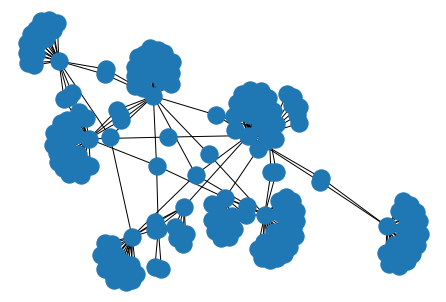

[((1, '1'), (0, '4')), ((1, '1'), (0, '14')), ((1, '1'), (0, '15')), ((1, '1'), (0, '16')), ((1, '1'), (0, '17')), ((1, '1'), (1, '1')), ((1, '1'), (0, '5')), ((1, '1'), (0, '82')), ((1, '1'), (0, '35')), ((1, '1'), (0, '19')), ((1, '1'), (0, '20')), ((1, '1'), (0, '21')), ((1, '1'), (0, '22')), ((1, '1'), (0, '23')), ((1, '1'), (0, '24')), ((1, '1'), (0, '25')), ((1, '1'), (0, '26')), ((1, '1'), (0, '27')), ((1, '1'), (0, '28')), ((1, '1'), (0, '29')), ((1, '1'), (0, '30')), ((1, '1'), (0, '31')), ((1, '1'), (0, '32')), ((1, '1'), (0, '33')), ((1, '1'), (0, '34')), ((1, '184'), (1, '184')), ((1, '184'), (0, '82')), ((1, '184'), (0, '152')), ((1, '184'), (0, '153')), ((1, '184'), (0, '154')), ((1, '184'), (0, '155')), ((1, '184'), (0, '156')), ((1, '184'), (0, '157')), ((1, '184'), (0, '158')), ((1, '184'), (0, '159')), ((1, '184'), (0, '160')), ((1, '184'), (0, '161')), ((1, '184'), (0, '162')), ((1, '184'), (0, '163')), ((1, '184'), (0, '164')), ((1, '184'), (0, '165')), ((1, '184'),

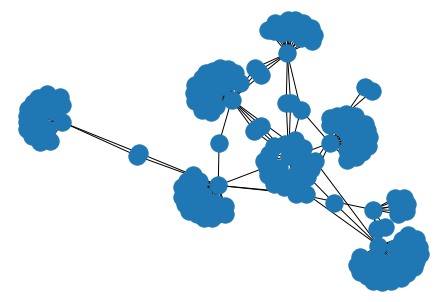

[((2, '1'), (0, '4')), ((2, '1'), (0, '14')), ((2, '1'), (0, '15')), ((2, '1'), (0, '16')), ((2, '1'), (0, '17')), ((2, '1'), (2, '1')), ((2, '1'), (0, '35')), ((2, '1'), (0, '19')), ((2, '1'), (0, '20')), ((2, '1'), (0, '21')), ((2, '1'), (0, '22')), ((2, '1'), (0, '23')), ((2, '1'), (0, '24')), ((2, '1'), (0, '25')), ((2, '1'), (0, '26')), ((2, '1'), (0, '27')), ((2, '1'), (0, '28')), ((2, '1'), (0, '29')), ((2, '1'), (0, '30')), ((2, '1'), (0, '31')), ((2, '1'), (0, '32')), ((2, '1'), (0, '33')), ((2, '1'), (0, '34')), ((2, '1'), (2, '176')), ((2, '1'), (0, '9')), ((2, '1'), (0, '102')), ((2, '1'), (0, '36')), ((2, '1'), (0, '37')), ((2, '1'), (0, '38')), ((2, '1'), (0, '39')), ((2, '1'), (0, '40')), ((2, '1'), (0, '41')), ((2, '1'), (0, '42')), ((2, '1'), (0, '43')), ((2, '1'), (0, '44')), ((2, '1'), (0, '45')), ((2, '1'), (0, '46')), ((2, '1'), (0, '47')), ((2, '1'), (0, '48')), ((2, '1'), (0, '49')), ((2, '1'), (0, '50')), ((2, '1'), (0, '51')), ((2, '1'), (0, '52')), ((2, '1'), 

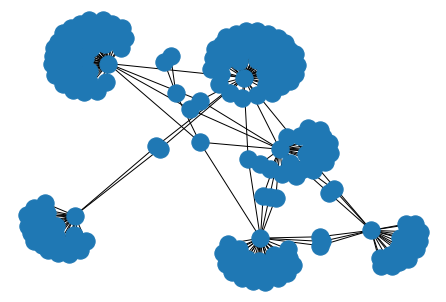

[((3, '1'), (0, '4')), ((3, '1'), (0, '14')), ((3, '1'), (0, '15')), ((3, '1'), (0, '16')), ((3, '1'), (0, '17')), ((3, '1'), (3, '1')), ((3, '1'), (0, '35')), ((3, '1'), (0, '19')), ((3, '1'), (0, '20')), ((3, '1'), (0, '21')), ((3, '1'), (0, '22')), ((3, '1'), (0, '23')), ((3, '1'), (0, '24')), ((3, '1'), (0, '25')), ((3, '1'), (0, '26')), ((3, '1'), (0, '27')), ((3, '1'), (0, '28')), ((3, '1'), (0, '29')), ((3, '1'), (0, '30')), ((3, '1'), (0, '31')), ((3, '1'), (0, '32')), ((3, '1'), (0, '33')), ((3, '1'), (0, '34')), ((3, '1'), (2, '176')), ((3, '1'), (0, '36')), ((3, '1'), (0, '37')), ((3, '1'), (0, '38')), ((3, '1'), (0, '39')), ((3, '1'), (0, '40')), ((3, '1'), (0, '41')), ((3, '1'), (0, '42')), ((3, '1'), (0, '43')), ((3, '1'), (0, '44')), ((3, '1'), (0, '45')), ((3, '1'), (0, '46')), ((3, '1'), (0, '47')), ((3, '1'), (0, '48')), ((3, '1'), (0, '49')), ((3, '1'), (0, '50')), ((3, '1'), (0, '51')), ((3, '1'), (0, '52')), ((3, '1'), (0, '53')), ((3, '1'), (0, '54')), ((3, '1'), 

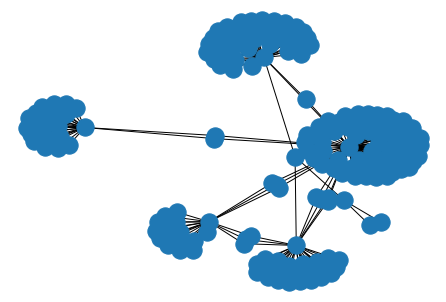

[((4, '1'), (0, '4')), ((4, '1'), (0, '14')), ((4, '1'), (0, '15')), ((4, '1'), (0, '16')), ((4, '1'), (0, '17')), ((4, '1'), (4, '1')), ((4, '1'), (0, '35')), ((4, '1'), (0, '19')), ((4, '1'), (0, '20')), ((4, '1'), (0, '21')), ((4, '1'), (0, '22')), ((4, '1'), (0, '23')), ((4, '1'), (0, '24')), ((4, '1'), (0, '25')), ((4, '1'), (0, '26')), ((4, '1'), (0, '27')), ((4, '1'), (0, '28')), ((4, '1'), (0, '29')), ((4, '1'), (0, '30')), ((4, '1'), (0, '31')), ((4, '1'), (0, '32')), ((4, '1'), (0, '33')), ((4, '1'), (0, '34')), ((4, '1'), (0, '36')), ((4, '1'), (0, '37')), ((4, '1'), (0, '38')), ((4, '1'), (0, '39')), ((4, '1'), (0, '40')), ((4, '1'), (0, '41')), ((4, '1'), (0, '42')), ((4, '1'), (0, '43')), ((4, '1'), (0, '44')), ((4, '1'), (0, '45')), ((4, '1'), (0, '46')), ((4, '1'), (0, '47')), ((4, '1'), (0, '48')), ((4, '1'), (0, '49')), ((4, '1'), (0, '50')), ((4, '1'), (0, '51')), ((4, '1'), (0, '52')), ((4, '1'), (0, '53')), ((4, '1'), (0, '54')), ((4, '1'), (0, '55')), ((4, '1'), (

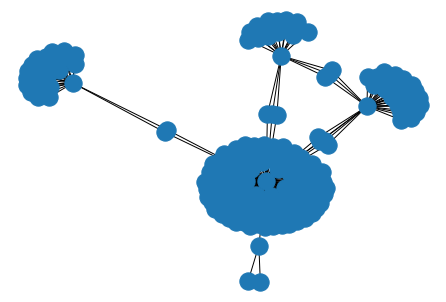

[((5, '1'), (0, '4')), ((5, '1'), (0, '14')), ((5, '1'), (0, '15')), ((5, '1'), (0, '16')), ((5, '1'), (0, '17')), ((5, '1'), (5, '1')), ((5, '1'), (0, '35')), ((5, '1'), (0, '19')), ((5, '1'), (0, '20')), ((5, '1'), (0, '21')), ((5, '1'), (0, '22')), ((5, '1'), (0, '23')), ((5, '1'), (0, '24')), ((5, '1'), (0, '25')), ((5, '1'), (0, '26')), ((5, '1'), (0, '27')), ((5, '1'), (0, '28')), ((5, '1'), (0, '29')), ((5, '1'), (0, '30')), ((5, '1'), (0, '31')), ((5, '1'), (0, '32')), ((5, '1'), (0, '33')), ((5, '1'), (0, '34')), ((5, '1'), (0, '36')), ((5, '1'), (0, '37')), ((5, '1'), (0, '38')), ((5, '1'), (0, '39')), ((5, '1'), (0, '40')), ((5, '1'), (0, '41')), ((5, '1'), (0, '42')), ((5, '1'), (0, '43')), ((5, '1'), (0, '44')), ((5, '1'), (0, '45')), ((5, '1'), (0, '46')), ((5, '1'), (0, '47')), ((5, '1'), (0, '48')), ((5, '1'), (0, '49')), ((5, '1'), (0, '50')), ((5, '1'), (0, '51')), ((5, '1'), (0, '52')), ((5, '1'), (0, '53')), ((5, '1'), (0, '54')), ((5, '1'), (0, '55')), ((5, '1'), (

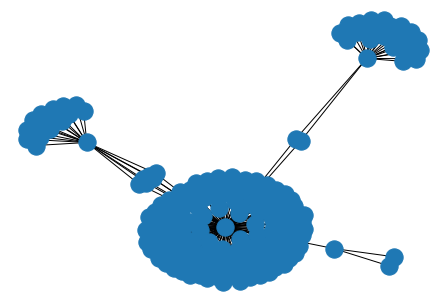

In [12]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---

### Procedura frattale

[torna su](#Indice)

Comprimi **solo se** il livello è uguale all'interno del motif

si potrebbe trovare una legge di multipli per sapere già i nodi comprimibili (?)

compressione di strutture di nodi indipendenti

all'iterazione successiva comprimo su ciò che è già stato compresso

In [30]:
motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

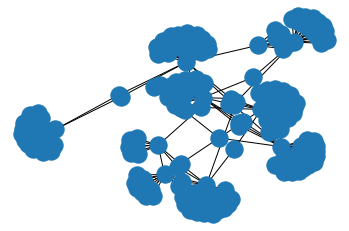

In [31]:
filename = 'bn-mouse_visual-cortex_2.edges'
G = nx.read_edgelist(filename)

nx.draw_networkx(G, with_labels=False)
plt.axis('off')
plt.show()

In [32]:
G = rinomina(G0)

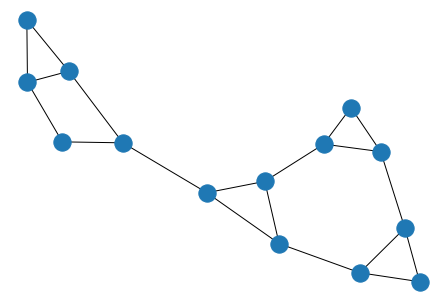

In [91]:
G0 = nx.Graph()
G0.add_edges_from([(1, 2), (2, 3), (1, 3), (2, 4), (4, 5), (5, 6), (4, 6),
                   (6, 8), (7, 8), (7, 9), (8, 9), (3, 7), (5, 14), (14, 10),
                   (14, 13), (10, 11), (11, 12), (10, 12), (12, 13)])
nx.draw(G0)

G = rinomina(G0)

In [33]:
def all_equal(iterator):
    iterator = [x[0] for x in iterator]
    return len(set(iterator)) <= 1

In [34]:
def frattale(G, motif):
    n, a = [], []
    # nodi G
    nodi = list(G.nodes())
    nodi.sort(key=lambda x:x[1])
    archi = list(G.edges())
    n.append(nodi)
    a.append(archi)
    #ris = identify(motif, G)
    liv = 0
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
            
        ris = identify(motif, G)
        print(nodi, "\n\n", ris, "\n\n")
        for i in ris:
            print(i, all_equal(i))
            if all_equal(i) == True:
                mapping = zippa(ris, nodi)
                G = nx.relabel_nodes(G, mapping)
                print(mapping)
            ris = ris[1:]
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv+=1
            print(n)
            
    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))
            
    res = list(zip(d, map(min, d.values())))
    
    return res

risultato = frattale(G, motif)

[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), (0, (0, '150')), (0, (0, '151')), (0, (0, '152')), (0,

TypeError: 'NoneType' object is not callable

In [29]:
risultato = frattale(G, motif)

[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), (0, (0, '150')), (0, (0, '151')), (0, (0, '152')), (0,

[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), (0, (0, '150')), (0, (0, '151')), (0, (0, '152')), (0,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[(0, (0, '1')), (0, (0, '12')), (0, (0, '4'))] True
[[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), 

In [20]:
risultato

NameError: name 'risultato' is not defined

In [ ]:
    if ris == []:
            print("fine")
            return
    while all_equal(ris[0]) == True:
        
        if all_equal(ris[0]) == False:
            #print("AOOOOO")
            ris = ris[1:]
            
        else: #if all_equal(ris[0]) == True:
            print(ris[0], all_equal(ris[0]))
            #if all_equal(ris[0]) == True:
                
            
            G = nx.relabel_nodes(G, mapping)
            # togli triangolo usato
            # la lista ris diminuisce
            ris = ris[1:]                
            # i nodi cambiano, sono il risultato della compressione
            nodi = list(G.nodes())
            nodi.sort(key=lambda x:x[1])
            archi = list(G.edges())
            n.append(nodi)
            a.append(archi)
            liv += 1
            #print(liv)
            
            """
    ris = identify(motif, G)
    print("\n\n", nodi, "\n\n", ris, "\n\n")
    for i in ris:
        print(i, all_equal(i))
        if all_equal(i) == True:
            print("yee")
            mapping = zippa(ris, nodi)
            G = nx.relabel_nodes(G, mapping)
            print(mapping)
        ris = ris[1:]
        nodi = list(G.nodes())
        nodi.sort(key=lambda x:x[1])
        archi = list(G.edges())
        n.append(nodi)
        a.append(archi)
        print(n)"""
    
    #return ris
            
    tot = list(zip(n, a))
    tup = ()
    lista = []
    for x in tot:
        max_liv = max(x[0], key=itemgetter(0))[0]
        l = len(x[0])
        tup = (max_liv, l, x[0], x[1])
        lista.append(tup)

    d = defaultdict(list)
    for name, num, nod, arc in lista:
        d[name].append((num, nod, arc))
            
    res = list(zip(d, map(min, d.values())))
    
    return res
risultato = frattale(G, motif)

In [132]:
res = risultato

In [21]:
res = frattale(G, motif)
livello, num_nodi, nodi, archi = [], [], [], []
for i in res:
    livello.append(i[0])
    num_nodi.append(i[1][0])
    nodi.append(i[1][1])
    archi.append(i[1][2])

print("Livello: ", livello, "\n# nodi: ", num_nodi,
      "\nNodi: ", nodi, "\nArchi: ", archi, "\n\n")

[(0, (0, '1')), (0, (0, '10')), (0, (0, '100')), (0, (0, '101')), (0, (0, '102')), (0, (0, '103')), (0, (0, '104')), (0, (0, '105')), (0, (0, '106')), (0, (0, '107')), (0, (0, '108')), (0, (0, '109')), (0, (0, '11')), (0, (0, '110')), (0, (0, '111')), (0, (0, '112')), (0, (0, '113')), (0, (0, '114')), (0, (0, '115')), (0, (0, '116')), (0, (0, '117')), (0, (0, '118')), (0, (0, '119')), (0, (0, '12')), (0, (0, '120')), (0, (0, '121')), (0, (0, '122')), (0, (0, '123')), (0, (0, '124')), (0, (0, '125')), (0, (0, '126')), (0, (0, '127')), (0, (0, '128')), (0, (0, '129')), (0, (0, '130')), (0, (0, '131')), (0, (0, '132')), (0, (0, '133')), (0, (0, '134')), (0, (0, '135')), (0, (0, '136')), (0, (0, '137')), (0, (0, '138')), (0, (0, '139')), (0, (0, '14')), (0, (0, '140')), (0, (0, '141')), (0, (0, '142')), (0, (0, '143')), (0, (0, '144')), (0, (0, '145')), (0, (0, '146')), (0, (0, '147')), (0, (0, '148')), (0, (0, '149')), (0, (0, '15')), (0, (0, '150')), (0, (0, '151')), (0, (0, '152')), (0,

TypeError: 'NoneType' object is not callable

In [56]:
nodi

[[(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (0, 9),
  (0, 10),
  (0, 11),
  (0, 12),
  (0, 13),
  (0, 14)],
 [(1, 1), (1, 4), (1, 7), (1, 10), (0, 13), (0, 14)]]

[((0, 1), (0, 2)), ((0, 1), (0, 3)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 3), (0, 7)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6)), ((0, 5), (0, 14)), ((0, 6), (0, 8)), ((0, 8), (0, 7)), ((0, 8), (0, 9)), ((0, 7), (0, 9)), ((0, 14), (0, 10)), ((0, 14), (0, 13)), ((0, 10), (0, 11)), ((0, 10), (0, 12)), ((0, 13), (0, 12)), ((0, 11), (0, 12))]


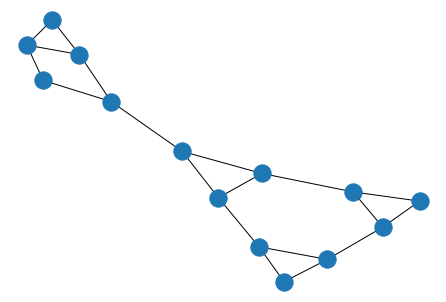

[((1, 1), (1, 1)), ((1, 1), (1, 4)), ((1, 1), (1, 7)), ((1, 4), (1, 4)), ((1, 4), (0, 14)), ((1, 4), (1, 7)), ((1, 7), (1, 7)), ((0, 14), (1, 10)), ((0, 14), (0, 13)), ((1, 10), (1, 10)), ((1, 10), (0, 13))]


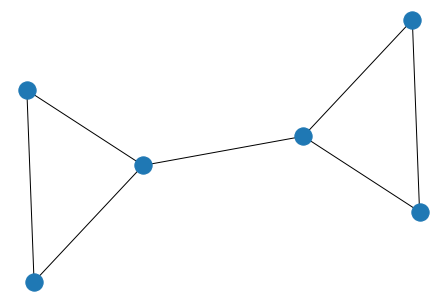

[((2, 1), (2, 1)), ((2, 1), (0, 14)), ((0, 14), (1, 10)), ((0, 14), (0, 13)), ((1, 10), (1, 10)), ((1, 10), (0, 13))]


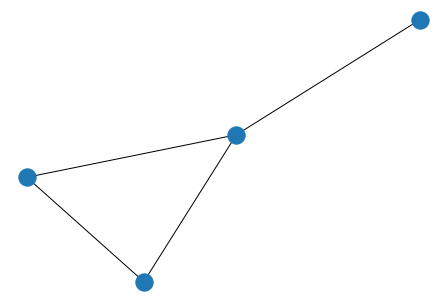

In [134]:
for i in archi:
    print(i)
    GG = nx.Graph()
    GG.add_edges_from(i)
    plt.clf()
    nx.draw(GG)
    plt.pause(1)
    plt.show()

---
### Memorizza merge
[torna su](#Indice)

Memorizza merge, per poter ricostruire inversamente

Ora funziona con il primo mapping, da rendere iterabile

In [113]:
nodi = list(G.nodes())
nodi.sort(key=lambda x:x[1])
ris = identify(motif, G)
mapping = zippa(ris, nodi)
m = zippa(ris, nodi)

In [114]:
# Memorizza [(0, 1), (0, 7), (0, 8)] = (1, 1)
m

{(0, 1): (1, 1),
 (0, 2): (0, 2),
 (0, 3): (0, 3),
 (0, 4): (0, 4),
 (0, 5): (0, 5),
 (0, 6): (0, 6),
 (0, 7): (1, 1),
 (0, 8): (1, 1)}

In [115]:
def memo(mapping, n):
    value_occurrences = collections.Counter(mapping.values())
    filtered_dict = {key: value for key, value in mapping.items()
                     if value_occurrences[value] == n}
    new_list = []
    for i, j in filtered_dict.items():
        j = list(j)
        j = i
        j = tuple(j)
        new_list.append(j)
    a = [i for i in new_list[0]]
    a[0] = a[0]+1
    a = tuple(a)
    thisdict = {a: new_list}
    return thisdict

# n fisso a 3 perché graphlet di 3 nodi
memo(m, 3)

{(1, 1): [(0, 1), (0, 7), (0, 8)]}

***

### Indici
[torna su](#Indice)

**Nodi compressi e nodi mantenuti, count e %**

In [116]:
def nodes_decrease(num_nodi):
    decrease = num_nodi[0] - num_nodi[-1]
    # % decrease = decrease ÷ grafo_0 × 100
    decrease_perc = decrease / num_nodi[0] * 100
    # remain = grafo_fin
    remain = num_nodi[-1]
    # remain_perc inverso di decrease_perc
    remain_perc = 100 - decrease_perc
    #remain_perc2 = len(grafo_fin) / len(grafo_0) * 100

    return (decrease, decrease_perc, remain, remain_perc)

nodes_decrease(num_nodi)

(4, 50.0, 4, 50.0)

#### Statistiche per livello

In [117]:
for i in res:
    print("Livello: ", i[0], "\n# nodi: ", i[1][0], "\nNodi: ",
          i[1][1], "\nArchi: ", i[1][2], "\n\n")

Livello:  0 
# nodi:  8 
Nodi:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)] 
Archi:  [((0, 7), (0, 1)), ((0, 7), (0, 8)), ((0, 1), (0, 8)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 2), (0, 4)), ((0, 2), (0, 5)), ((0, 3), (0, 6)), ((0, 4), (0, 5)), ((0, 4), (0, 6)), ((0, 5), (0, 6))] 


Livello:  1 
# nodi:  4 
Nodi:  [(1, 1), (1, 2), (0, 3), (0, 6)] 
Archi:  [((1, 1), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (0, 3)), ((1, 2), (1, 2)), ((1, 2), (0, 6)), ((0, 3), (0, 6))] 


